In [1]:
import pandas as pd
import psycopg2
from psycopg2 import Error
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
try:
    connection = psycopg2.connect(user="zpy2745",
                                  password="xxx",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

In [9]:
tx = pd.read_sql("SELECT * FROM group_5.trnsact LIMIT 10000000;", connection);
tx

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_15160/4118874031.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tx = pd.read_sql("SELECT * FROM group_5.trnsact LIMIT 10000000;", connection);


,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,1118575,709,750,200,0,2005-05-17,P,1,69.0,69.00,69.00,342300047,988
1,1118575,709,890,200,208208604,2005-05-19,P,1,69.0,69.00,69.00,176800053,988
2,1118575,1509,60,3800,313808827,2005-06-04,P,1,69.0,69.00,69.00,469500088,988
3,1118575,1509,310,1800,0,2005-05-18,P,1,69.0,69.00,69.00,102800051,988
4,1118575,1509,310,2500,0,2005-05-31,P,1,69.0,69.00,69.00,403900050,988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2017651,1707,210,11200,0,2005-01-29,P,1,29.0,13.99,13.99,225300191,531
9999996,2017651,1707,220,400,0,2005-03-21,P,1,29.0,7.25,7.25,300700043,531
9999997,2017651,1707,590,600,0,2005-02-05,P,1,29.0,14.50,14.50,338900170,531
9999998,2017651,1807,70,800,0,2005-02-05,P,1,29.0,14.50,14.50,339000170,531


In [11]:
strinfo = pd.read_sql("SELECT * FROM group_5.strinfo;", connection);
strinfo

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_15160/2511957877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  strinfo = pd.read_sql("SELECT * FROM group_5.strinfo;", connection);


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


In [12]:
merged_data = pd.merge(strinfo, tx, on='STORE')

In [13]:
merged_data

,STORE,CITY,STATE,ZIP,SKU,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,102,TAMPA,FL,33607,1118597,250,800,0,2005-04-14,P,1,90.0,90.00,90.00,294500056,830
1,102,TAMPA,FL,33607,1118598,230,3400,726208892,2005-05-30,P,1,40.0,40.00,40.00,520200088,114
2,102,TAMPA,FL,33607,1118615,250,1100,417308816,2005-08-13,P,1,44.0,29.99,29.99,923900105,667
3,102,TAMPA,FL,33607,1118615,250,2000,0,2005-06-13,P,1,44.0,44.00,44.00,434100045,667
4,102,TAMPA,FL,33607,1118615,250,2600,903202806,2005-08-14,P,1,44.0,29.99,29.99,761100056,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9909,CHEYENNE,WY,82009,2017592,80,1900,0,2005-05-16,P,1,164.0,164.00,164.00,34100026,605
9999996,9909,CHEYENNE,WY,82009,2017616,780,900,526606927,2005-07-23,P,1,38.0,9.50,9.50,121300054,827
9999997,9909,CHEYENNE,WY,82009,2017616,980,700,675905956,2005-07-07,P,1,38.0,9.50,9.50,822600034,827
9999998,9909,CHEYENNE,WY,82009,2017616,980,800,0,2005-02-27,P,1,38.0,38.00,38.00,829100053,827


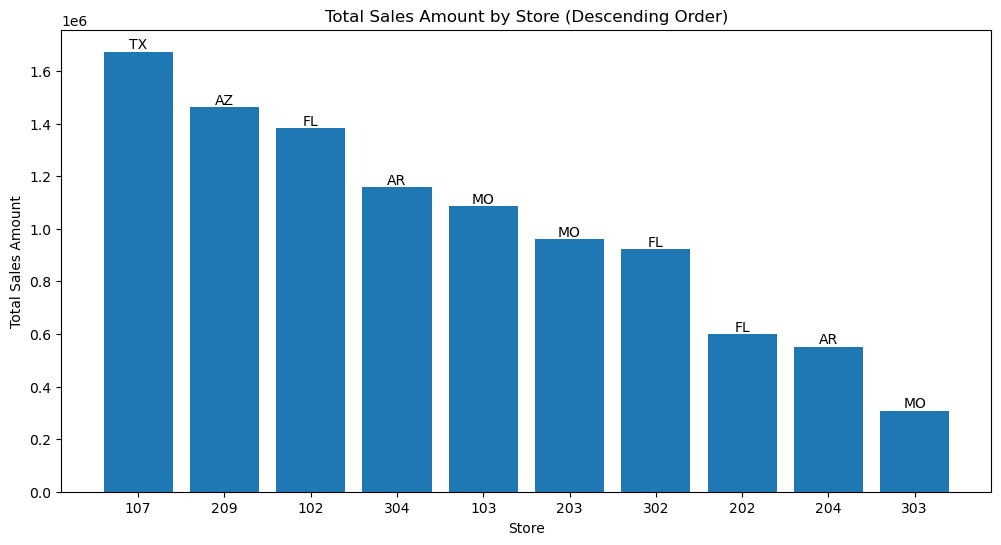

In [14]:
# Group data by STORE and calculate the total sales amount for each store
store_sales = merged_data.groupby('STORE')['AMT'].sum().head(10)

# Sort the stores by total sales amount in descending order
store_sales = store_sales.sort_values(ascending=False)

# Create a bar chart to visualize store sales
plt.figure(figsize=(12, 6))
bars = plt.bar(store_sales.index.astype(str), store_sales.values)
plt.xlabel('Store')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Store (Descending Order)')

# Add state names on top of each bar
for bar, store in zip(bars, store_sales.index.astype(str)):
    state = merged_data[merged_data['STORE'] == int(store)]['STATE'].values[0]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), state, ha='center', va='bottom')

plt.show()

In [15]:
merged_data['SALEDATE'] = pd.to_datetime(merged_data['SALEDATE'])

# Extract year from 'SALEDATE'
merged_data['YEAR'] = merged_data['SALEDATE'].dt.year
merged_data['Months'] = merged_data['SALEDATE'].dt.month
merged_data

,STORE,CITY,STATE,ZIP,SKU,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,YEAR,Months
0,102,TAMPA,FL,33607,1118597,250,800,0,2005-04-14,P,1,90.0,90.00,90.00,294500056,830,2005,4
1,102,TAMPA,FL,33607,1118598,230,3400,726208892,2005-05-30,P,1,40.0,40.00,40.00,520200088,114,2005,5
2,102,TAMPA,FL,33607,1118615,250,1100,417308816,2005-08-13,P,1,44.0,29.99,29.99,923900105,667,2005,8
3,102,TAMPA,FL,33607,1118615,250,2000,0,2005-06-13,P,1,44.0,44.00,44.00,434100045,667,2005,6
4,102,TAMPA,FL,33607,1118615,250,2600,903202806,2005-08-14,P,1,44.0,29.99,29.99,761100056,667,2005,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9909,CHEYENNE,WY,82009,2017592,80,1900,0,2005-05-16,P,1,164.0,164.00,164.00,34100026,605,2005,5
9999996,9909,CHEYENNE,WY,82009,2017616,780,900,526606927,2005-07-23,P,1,38.0,9.50,9.50,121300054,827,2005,7
9999997,9909,CHEYENNE,WY,82009,2017616,980,700,675905956,2005-07-07,P,1,38.0,9.50,9.50,822600034,827,2005,7
9999998,9909,CHEYENNE,WY,82009,2017616,980,800,0,2005-02-27,P,1,38.0,38.00,38.00,829100053,827,2005,2


# Number of Top 10 Stores Over the past Year

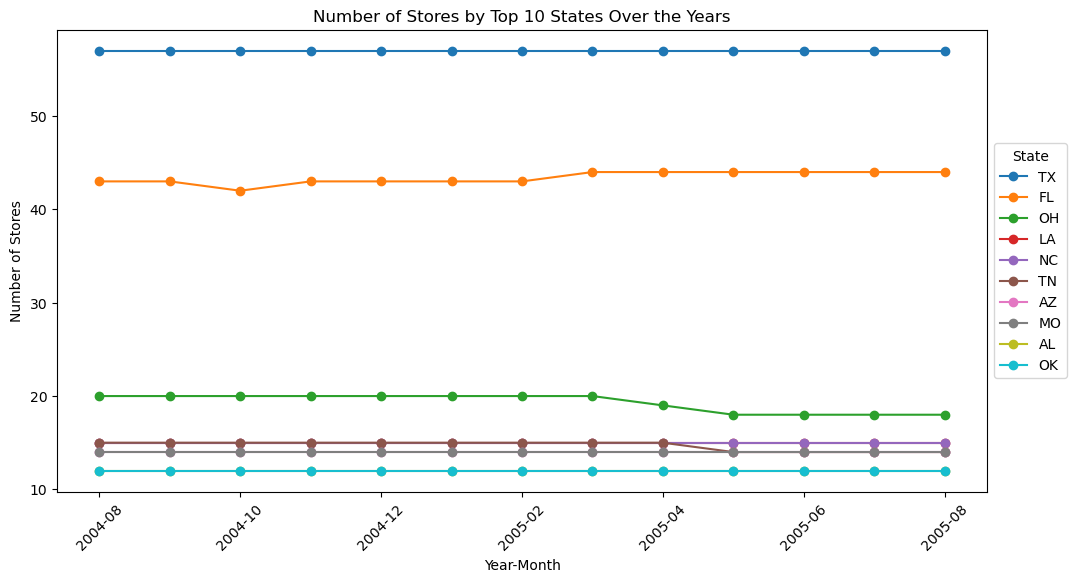

In [17]:
store_counts = merged_data.groupby(['YEAR', 'Months', 'STATE'])['STORE'].nunique()
store_counts = store_counts.reset_index()
store_counts['Year-Month'] = store_counts['YEAR'].astype(str) + '-' + store_counts['Months'].astype(str).str.zfill(2)
store_counts_pivot = store_counts.pivot(index='Year-Month', columns='STATE', values='STORE').fillna(0)

top_10_states = store_counts_pivot.sum().nlargest(10).index
store_counts_pivot[top_10_states].plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Year-Month')
plt.ylabel('Number of Stores')
plt.title('Number of Stores by Top 10 States Over the Years')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.show()


# General Trend for Sales by Month

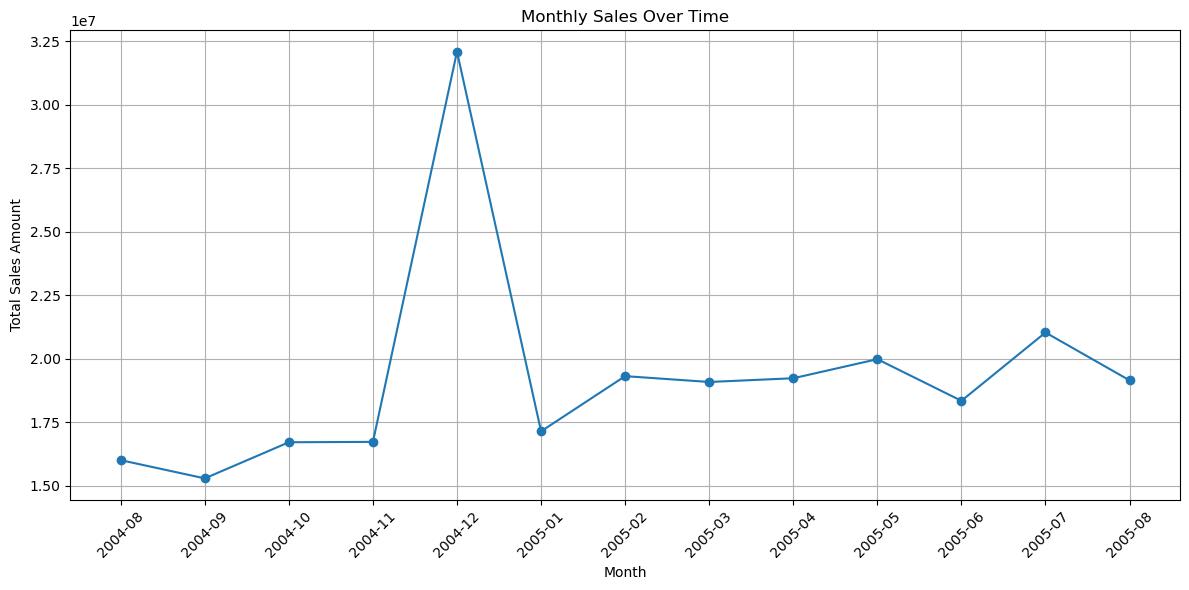

In [18]:
merged_data['SALEDATE'] = pd.to_datetime(merged_data['SALEDATE'])
monthly_sales = merged_data.groupby(['YEAR', 'Months'])['AMT'].sum()
plt.figure(figsize=(12, 6))
months = [f"{y}-{m:02}" for y, m in monthly_sales.index]
plt.plot(months, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()

plt.show()

# Sales by Month per State

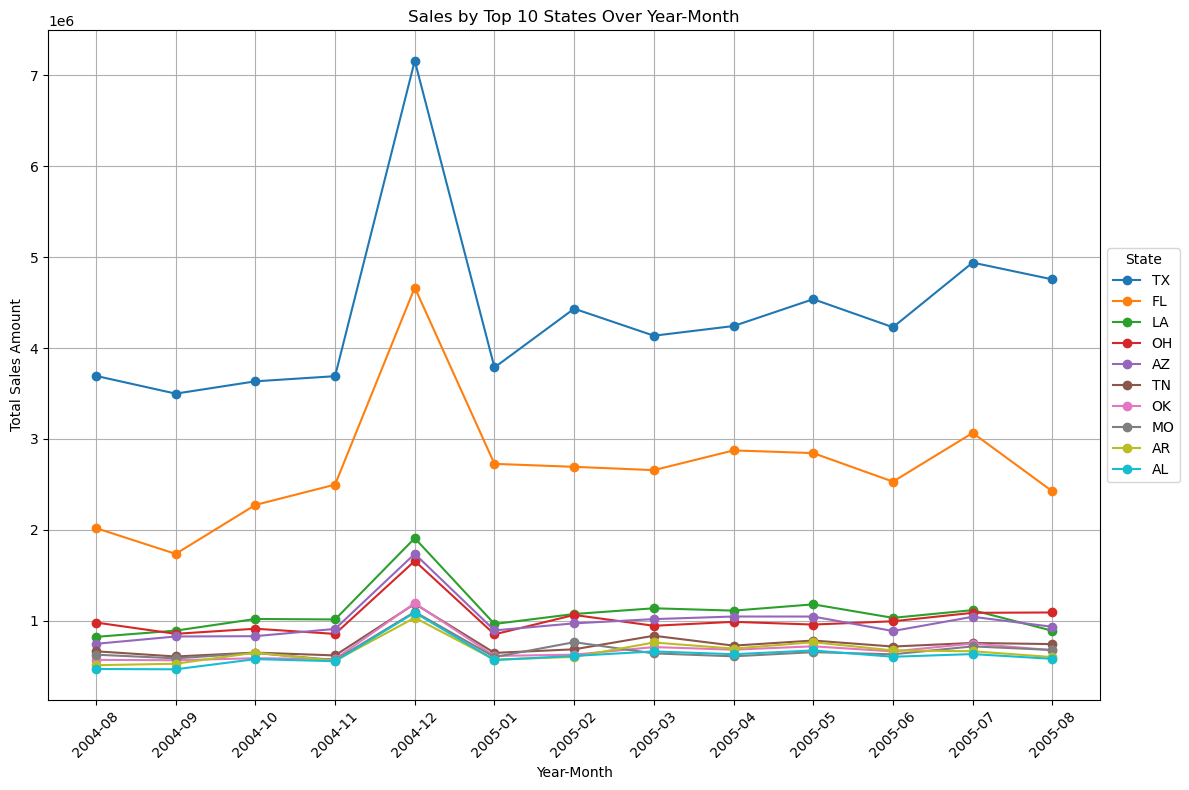

In [19]:
sales_by_state = merged_data.groupby(['YEAR', 'Months', 'STATE'])['AMT'].sum()
sales_by_state = sales_by_state.reset_index()
sales_by_state['Year-Month'] = sales_by_state['YEAR'].astype(str) + '-' + sales_by_state['Months'].astype(str).str.zfill(2)
top_10_states = sales_by_state.groupby('STATE')['AMT'].sum().nlargest(10).index

sales_by_state_top_10 = sales_by_state[sales_by_state['STATE'].isin(top_10_states)]
plt.figure(figsize=(12, 8))

for state in top_10_states:
    state_sales = sales_by_state_top_10[sales_by_state_top_10['STATE'] == state]
    plt.plot(state_sales['Year-Month'], state_sales['AMT'], label=state, marker='o')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.title('Sales by Top 10 States Over Year-Month')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
merged_data['DIFFERENCES'] = merged_data['ORGPRICE'] - merged_data['SPRICE']
merged_data['DISCOUNT_PERCENT'] = merged_data['PROFIT']/ merged_data['ORGPRICE'] * 100
merged_data

,STORE,CITY,STATE,ZIP,SKU,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,YEAR,Months,DISCOUNT_PERCENT,DIFFERENCES
0,102,TAMPA,FL,33607,1118597,250,800,0,2005-04-14,P,1,90.0,90.00,90.00,294500056,830,2005,4,0.000000,0.00
1,102,TAMPA,FL,33607,1118598,230,3400,726208892,2005-05-30,P,1,40.0,40.00,40.00,520200088,114,2005,5,0.000000,0.00
2,102,TAMPA,FL,33607,1118615,250,1100,417308816,2005-08-13,P,1,44.0,29.99,29.99,923900105,667,2005,8,31.840909,14.01
3,102,TAMPA,FL,33607,1118615,250,2000,0,2005-06-13,P,1,44.0,44.00,44.00,434100045,667,2005,6,0.000000,0.00
4,102,TAMPA,FL,33607,1118615,250,2600,903202806,2005-08-14,P,1,44.0,29.99,29.99,761100056,667,2005,8,31.840909,14.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9909,CHEYENNE,WY,82009,2017592,80,1900,0,2005-05-16,P,1,164.0,164.00,164.00,34100026,605,2005,5,0.000000,0.00
9999996,9909,CHEYENNE,WY,82009,2017616,780,900,526606927,2005-07-23,P,1,38.0,9.50,9.50,121300054,827,2005,7,75.000000,28.50
9999997,9909,CHEYENNE,WY,82009,2017616,980,700,675905956,2005-07-07,P,1,38.0,9.50,9.50,822600034,827,2005,7,75.000000,28.50
9999998,9909,CHEYENNE,WY,82009,2017616,980,800,0,2005-02-27,P,1,38.0,38.00,38.00,829100053,827,2005,2,0.000000,0.00
